In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

dt = pd.read_csv(r"\Users\Kishor\Desktop\walmart_stock.csv",index_col = 'Date',parse_dates = True)
dt.head()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


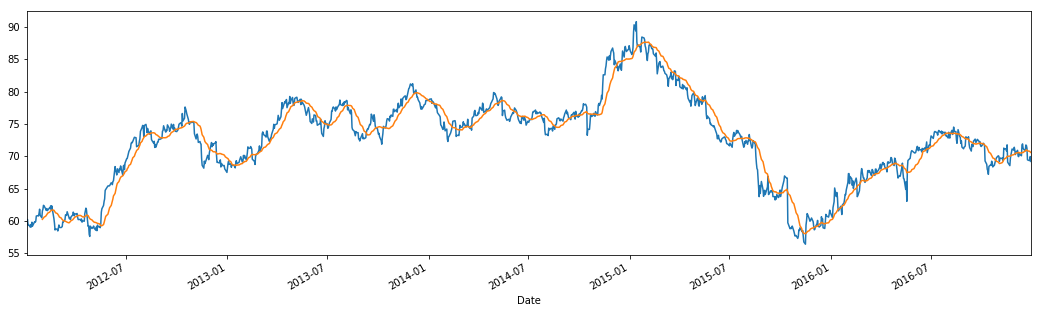

In [3]:
dt['Open'].plot()
dt['Close'].rolling(20).mean().plot(figsize=(18,5))

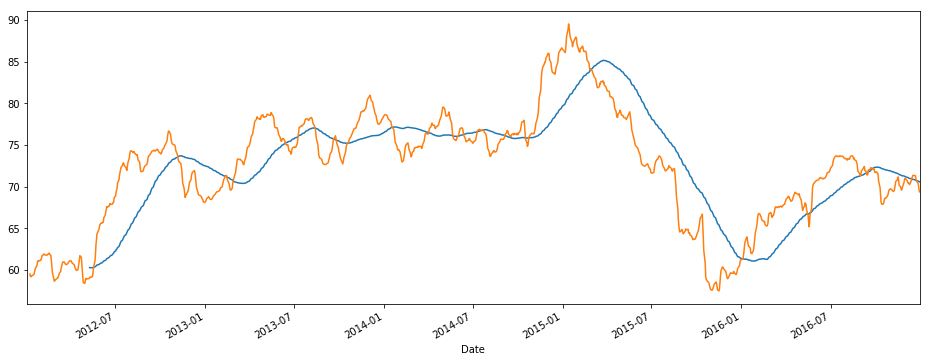

In [4]:
dt['20 ma'] = dt['Close'].rolling(90).mean() .plot()
dt['5 ma'] = dt['Close'].rolling(5).mean().plot(figsize=(16,6))

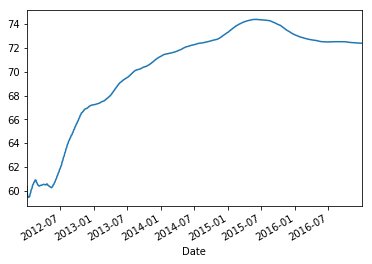

In [5]:
dt['Close'].expanding().mean().plot()

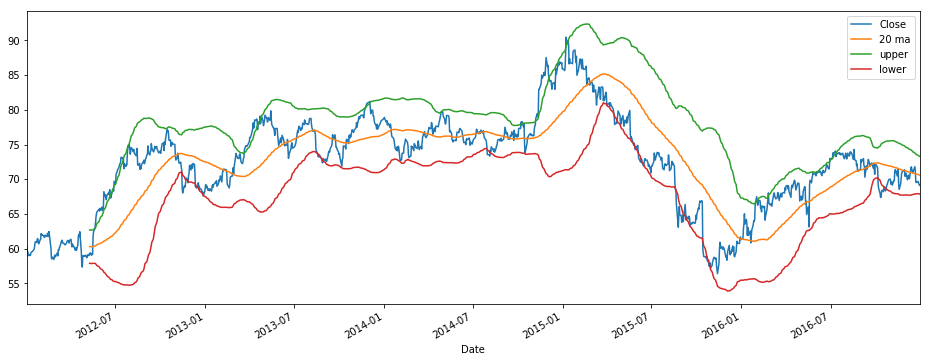

In [6]:
dt['20 ma'] = dt['Close'].rolling(90).mean()

dt['upper'] = dt['Close'].rolling(90).mean() + 2*(dt['Close'].rolling(90).std())

dt['lower'] = dt['Close'].rolling(90).mean() - 2*(dt['Close'].rolling(90).std())

dt[['Close','20 ma','upper','lower']].plot(figsize=(16,6))

In [41]:
dt['returns'] = (dt['Close']/dt['Close'].shift(1)) +1
dt['Close']

Date
2012-01-03    60.330002
2012-01-04    59.709999
2012-01-05    59.419998
2012-01-06    59.000000
2012-01-09    59.180000
2012-01-10    59.040001
2012-01-11    59.400002
2012-01-12    59.500000
2012-01-13    59.540001
2012-01-17    59.849998
2012-01-18    60.009998
2012-01-19    60.610001
2012-01-20    61.009998
2012-01-23    60.910000
2012-01-24    61.389999
2012-01-25    61.470001
2012-01-26    60.970001
2012-01-27    60.709999
2012-01-30    61.299999
2012-01-31    61.360001
2012-02-01    62.180000
2012-02-02    61.939999
2012-02-03    62.029999
2012-02-06    61.880001
2012-02-07    61.689999
2012-02-08    61.619999
2012-02-09    61.959999
2012-02-10    61.900002
2012-02-13    61.790001
2012-02-14    62.220001
                ...    
2016-11-17    69.190002
2016-11-18    68.540001
2016-11-21    69.370003
2016-11-22    70.120003
2016-11-23    70.830002
2016-11-25    71.230003
2016-11-28    71.190002
2016-11-29    71.370003
2016-11-30    70.430000
2016-12-01    70.669998
2016-12-02 

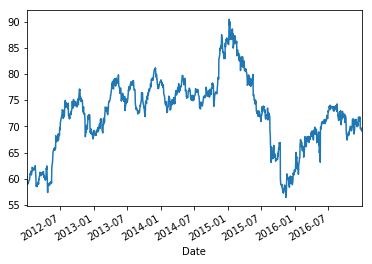

In [43]:
dt['Close'].plot()

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv(r'\Users\Kishor\Desktop\airline_passengers.csv',index_col = 'Month' , parse_dates = True)
df.head()



,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [51]:
df.dropna(inplace=True)

In [53]:
df.index = pd.to_datetime(df.index)

In [54]:
df

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


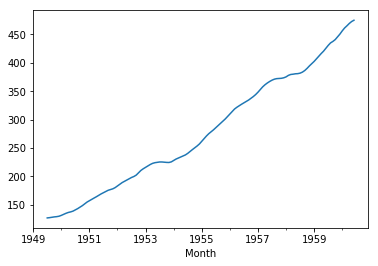

In [55]:
result = seasonal_decompose(df['Thousands of Passengers'], model = 'multiplicative')
result.trend.plot()

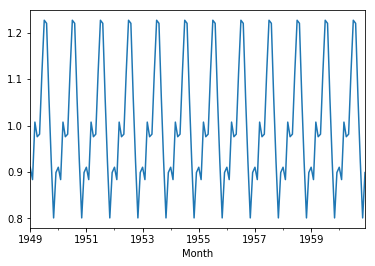

In [56]:
result.seasonal.plot()

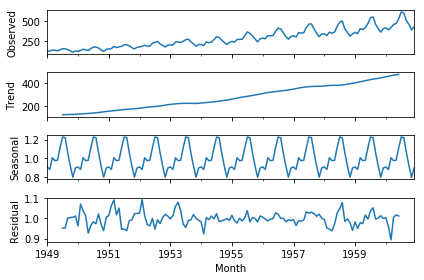

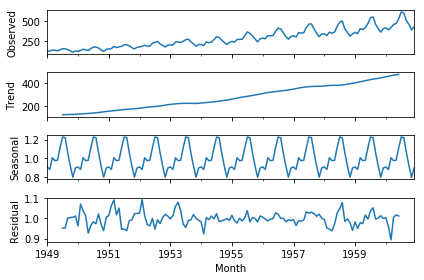

In [58]:
result.plot()